# Assignment #4: Linear Models and Decision Trees
## Foundations of Machine Learning
## Do Q1 and one other question.
### Advice: Reuse your code and code from lectures, package routine tasks into functions, make plans about how you'll carry out the analysis before jumping into writing code, and work as efficiently as possible

**Q1.** This question is a case study for linear models and decision trees. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Let's focus on linear models. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the test set? Make a second model where, for the categorical variables, make a model comprised of one-hot encoded regressors/features alone, and regress price on those variables; what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using, along with the categorical variables. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 3?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.
  7. Now, let's use a regression tree. Construct an appropriate matrix of regressors/features, and fit a tree to the data. Vary the maximum depth of the decision tree using the `max_depth` option (i.e. `tree.DecisionTreeRegressor(max_depth=D)`), and compute the $R^2$ and `RMSE` on the test set of a variety of depths. What depth tree gives the best results?
  8. For your best tree, determine the predicted values for the test data, and plot them against the true values. Do the predicted values and true values line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero?
  12. Which model --- linear model or classification and regression tree --- has better performance on the test set?

## Question 1

### Part 1
Load cars_hw.csv. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.

   Unnamed: 0        Make  Make_Year   Color  Body_Type  Mileage_Run  \
0           1  Volkswagen       2017  silver      sedan        44611   
1           2     Hyundai       2016     red  crossover        20305   
2           3       Honda       2019   white        suv        29540   
3           4     Renault       2017  bronze  hatchback        35680   
4           5     Hyundai       2017  orange  hatchback        25126   

  No_of_Owners  Seating_Capacity Fuel_Type Transmission Transmission_Type  \
0          1st                 5    diesel      7-Speed         Automatic   
1          1st                 5    petrol      5-Speed            Manual   
2          2nd                 5    petrol      5-Speed            Manual   
3          1st                 5    petrol      5-Speed            Manual   
4          1st                 5    petrol      5-Speed            Manual   

    Price  
0  657000  
1  682000  
2  793000  
3  414000  
4  515000  
<class 'pandas.core.frame.DataFr

<Axes: >

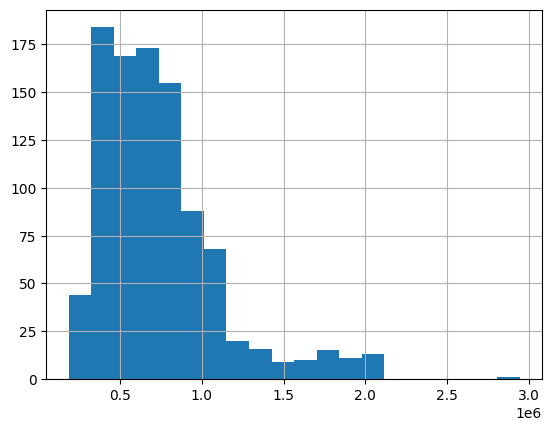

In [145]:
# Question 1.1
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

car = pd.read_csv('cars_hw.csv')
print(car.head())
print(car.info())

car['Price'].hist(bins=20)

<Axes: >

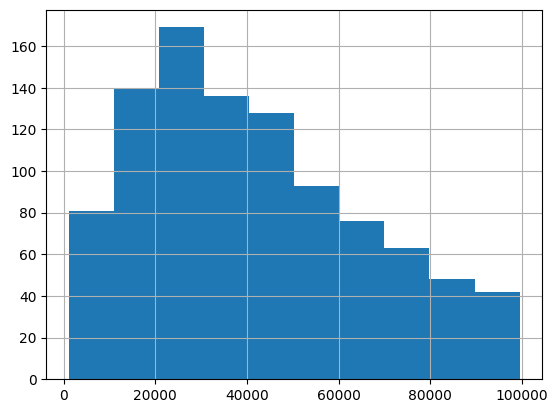

In [146]:
# did not scale because scaling made the distribution worse
car['Mileage_Run'].hist(bins=10)

<Axes: >

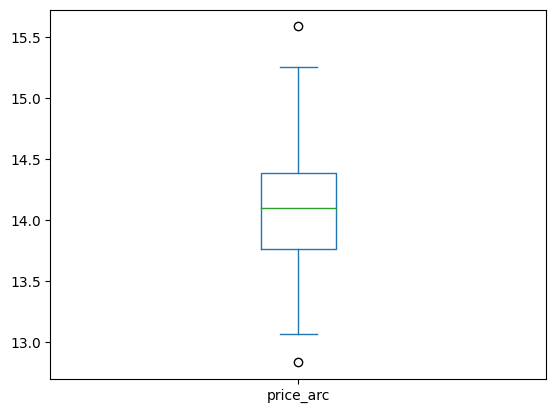

In [147]:
car['price_arc'] = np.arcsinh(car['Price'])
car['price_arc'].plot.box()

In [148]:
# remove the outliers for price
car = car.loc[car['price_arc']>13,:]
car = car.loc[car['price_arc']<15.5,:]

In [149]:
# doing some extra cleaning
car = car.drop(columns=['Unnamed: 0'])
car['No_of_Owners'] = car['No_of_Owners'].replace({'1st': 1, '2nd': 2, '3rd': 3})

### Part 2
Summarize the Price variable and create a kernel density plot. Use .groupby() and .describe() to summarize prices by brand (Make). Make a grouped kernel density plot by Make. Which car brands are the most expensive? What do prices look like in general?

In [150]:
# when doing summaries and plots, assumed we should use the scaled Price variable
car['price_arc'].describe()

count    974.000000
mean      14.103958
std        0.446380
min       13.068963
25%       13.766845
50%       14.102942
75%       14.383944
max       15.250595
Name: price_arc, dtype: float64

In [151]:
car.groupby('Make')['price_arc'].describe()

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Chevrolet,6.0,13.613042,0.480975,13.188151,13.261539,13.445433,13.864828,14.394369
Datsun,3.0,13.269194,0.036311,13.232114,13.251449,13.270783,13.287734,13.304685
Ford,52.0,14.161427,0.210895,13.270783,14.054527,14.162640,14.269131,14.572571
Honda,73.0,14.229465,0.336972,13.356645,13.965653,14.266586,14.419827,14.938490
Hyundai,305.0,14.061658,0.398781,13.114331,13.785051,14.059241,14.330727,15.063692
Jeep,4.0,14.909738,0.105084,14.763300,14.876417,14.933413,14.966733,15.008827
Kia,8.0,14.985324,0.076877,14.822738,14.965389,14.996253,15.042662,15.063117
MG Motors,35.0,15.132199,0.066263,14.971763,15.088892,15.122762,15.190744,15.211260
Mahindra,18.0,14.592100,0.159906,14.280502,14.544955,14.598828,14.654396,14.890513


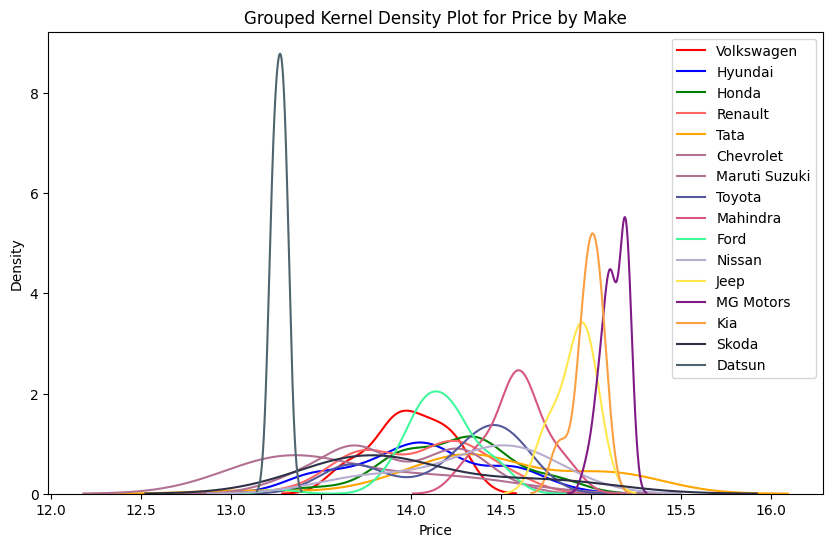

In [152]:
# kernel density plot
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green', '#ff6663', 'orange', '#b27092', '#b27092', '#53599a', '#d65780', '#40f99b', '#b7adcf',
          '#ffe74c', '#801a86', '#fa9f42', '#2d3047', '#4f646f']
for i, make in enumerate(car['Make'].unique()):
    sns.kdeplot(car[car['Make'] == make]['price_arc'], label=make, color=colors[i])
plt.title('Grouped Kernel Density Plot for Price by Make')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.show()

The car brands that are the most expensive are Kia and MG Motors which can be seen by looking at the graph above towards the upper end of the price spectrum. Kia and MG Motors have their peaks furthest to the right with relatively high density, indicating that a majority of their cars are in that price range. But Kia also has a small sample size of only 8 and it might not be a good representation of Kia cars. In general, though, for other car brands, prices tend to sit around 14.0 and are more spreadout in range of the prices. This could also be due to the fact that car brands such as Hyundai have a much larger sample size, which creates a more spread out density plot.

### Part 3
Split the data into an 80% training set and a 20% testing set.

In [153]:
from sklearn.model_selection import train_test_split

X = car.drop(columns=['price_arc', 'Price'])
y = car.loc[:, 'price_arc']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Part 4
Let's focus on linear models. Make a model where you regress price on the numeric variables alone; what is the  R2  and RMSE on the test set? Make a second model where, for the categorical variables, make a model comprised of one-hot encoded regressors/features alone, and regress price on those variables; what is the  R2  and RMSE on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the  R2  and RMSE on the test set? Does the joint model perform better or worse, and by home much?

In [154]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

X_train_numeric = X_train.select_dtypes(include=['number'])
X_test_numeric = X_test.select_dtypes(include=['number'])

model = LinearRegression()
model.fit(X_train_numeric, y_train)
y_pred = model.predict(X_test_numeric)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R-squared (R2):", r2)
print("Root Mean Squared Error (RMSE):", rmse)

R-squared (R2): 0.3665856857094715
Root Mean Squared Error (RMSE): 0.345636989717336


In [155]:
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer

X_train_cat = X_train.select_dtypes(include=['object'])
X_test_cat = X_test.select_dtypes(include=['object'])

cat_attribs = list(X_train_cat)
full_pipeline = ColumnTransformer([
        ("cat", OneHotEncoder(handle_unknown='ignore'), cat_attribs)
    ])

X_train_cat_prepared = full_pipeline.fit_transform(X_train_cat)
X_test_cat_prepared = full_pipeline.transform(X_test_cat)


model = LinearRegression()
model.fit(X_train_cat_prepared, y_train)
y_pred = model.predict(X_test_cat_prepared)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R-squared (R2):", r2)
print("Root Mean Squared Error (RMSE):", rmse)

R-squared (R2): 0.6042983061167575
Root Mean Squared Error (RMSE): 0.27318712766600134


The model that uses only categorical variables performs better on the test set than the model that uses only numerical variables. The numerical model has a R-squared of 0.37 while the categorical model has a R-squared of 0.604. A R-squared value that is closer to 1 indicates that the data fits well to the regression model. Furthermore, the root mean squared error was lower for the categorical model, meaning that it predicts on the test set better than the numerical model predicts on the test set.

In [156]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
X_train_cat = X_train.select_dtypes(include=['object'])
X_train_num = X_train.select_dtypes(include=['number'])
num_attribs = list(X_train_num)
cat_attribs = list(X_train_cat)

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median'))])

full_pipeline = ColumnTransformer([
        ('num', num_pipeline, num_attribs),
        ("cat", OneHotEncoder(handle_unknown='ignore'), cat_attribs)
    ])

X_train_prepared = full_pipeline.fit_transform(X_train)
X_test_prepared = full_pipeline.transform(X_test)

model = LinearRegression()
model.fit(X_train_prepared, y_train)
y_pred = model.predict(X_test_prepared)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R-squared (R2):", r2)
print("Root Mean Squared Error (RMSE):", rmse)

R-squared (R2): 0.7725822604376982
Root Mean Squared Error (RMSE): 0.20710398072254213


The joint model performs better by a good amount especially in how well the data fits to the regression model. The R-squared went from 0.604 up to 0.77, which is much closer to one. Furthermore, the rmse was lower by a bit indicating that the third model predicted the outcome of the test set better than both of the other models.

### Part 5
Use the PolynomialFeatures function from sklearn to expand the set of numerical variables you're using, along with the categorical variables. As you increase the degree of the expansion, how do the  R2  and RMSE change? At what point does  R2  go negative on the test set? For your best model with expanded features, what is the  R2  and RMSE? How does it compare to your best model from part 3?

In [157]:
from sklearn.preprocessing import PolynomialFeatures

X_train_cat = X_train.select_dtypes(include=['object'])
X_train_num = X_train.select_dtypes(include=['number'])
num_attribs = list(X_train_num)
cat_attribs = list(X_train_cat)

for i in range(10):
  print("Model", i + 1)
  num_pipeline = Pipeline([
      ('poly', PolynomialFeatures(degree=i+1, include_bias=False)),])

  full_pipeline = ColumnTransformer([
          ('num', num_pipeline, num_attribs),
          ("cat", OneHotEncoder(handle_unknown='ignore'), cat_attribs)
      ])

  X_train_prepared = full_pipeline.fit_transform(X_train)
  X_test_prepared = full_pipeline.transform(X_test)

  model = LinearRegression()
  model.fit(X_train_prepared, y_train)
  y_pred = model.predict(X_test_prepared)

  r2 = r2_score(y_test, y_pred)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))

  print("R-squared (R2):", r2)
  print("Root Mean Squared Error (RMSE):", rmse)

Model 1
R-squared (R2): 0.7725822604376982
Root Mean Squared Error (RMSE): 0.20710398072254213
Model 2
R-squared (R2): 0.804051333705987
Root Mean Squared Error (RMSE): 0.19224162690468577
Model 3
R-squared (R2): 0.7184029105985885
Root Mean Squared Error (RMSE): 0.23045724088185757
Model 4
R-squared (R2): 0.4367804808349862
Root Mean Squared Error (RMSE): 0.3259230876474441
Model 5
R-squared (R2): -2.1148279185182224
Root Mean Squared Error (RMSE): 0.7664667271519598
Model 6
R-squared (R2): 0.40491191587421005
Root Mean Squared Error (RMSE): 0.3350170455307458
Model 7
R-squared (R2): 0.4105042288405494
Root Mean Squared Error (RMSE): 0.33343917613475643
Model 8
R-squared (R2): 0.22358911061847753
Root Mean Squared Error (RMSE): 0.38266794679209815
Model 9
R-squared (R2): 0.2571745543211512
Root Mean Squared Error (RMSE): 0.37429985885004374
Model 10
R-squared (R2): 0.31378542611354243
Root Mean Squared Error (RMSE): 0.3597545090433706


As I increase the degree of expansion, there is not a clear pattern in how R-squared and rmse change. Intitally R-squared increases, then it decreases and becomes negative at degree=5, and then it increases, then decreases again. As for rmse, it does the opposite. It decreases, then increases and then decreases once again. The R-squared and rmse have an inverse relationship to one another.

My best model was the one with a degree of 2. The R-squared for this was 0.804 and the rmse was 0.1992. This model performed better than my previous best model, which was the one that used both numerical and categorical data.

### Part 6
For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

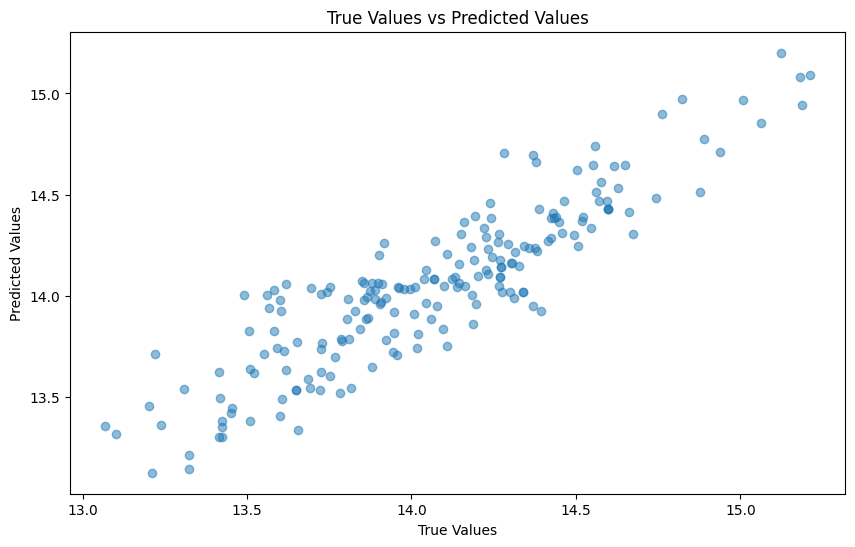

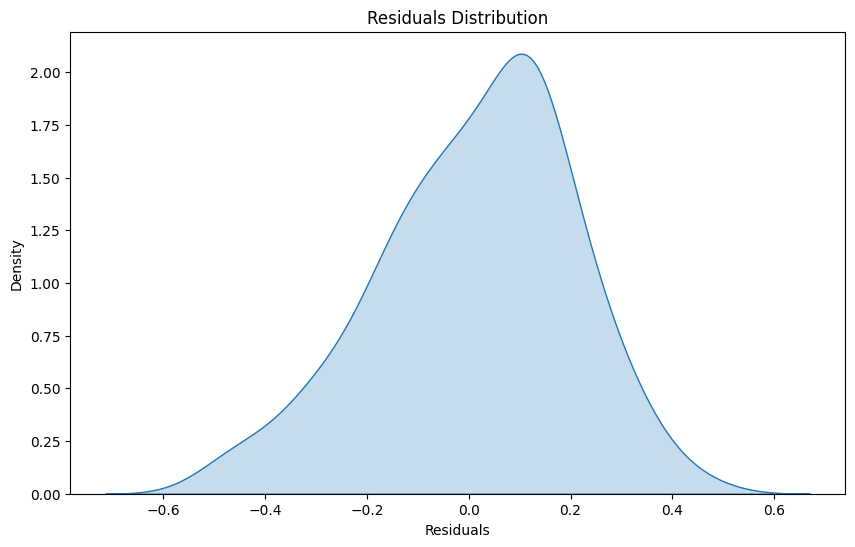

In [158]:
X_train_cat = X_train.select_dtypes(include=['object'])
X_train_num = X_train.select_dtypes(include=['number'])
num_attribs = list(X_train_num)
cat_attribs = list(X_train_cat)

num_pipeline = Pipeline([
      ('poly', PolynomialFeatures(degree=2, include_bias=False)),])

full_pipeline = ColumnTransformer([
        ('num', num_pipeline, num_attribs),
        ("cat", OneHotEncoder(handle_unknown='ignore'), cat_attribs)
    ])

X_train_prepared = full_pipeline.fit_transform(X_train)
X_test_prepared = full_pipeline.transform(X_test)

model = LinearRegression()
model.fit(X_train_prepared, y_train)
y_pred = model.predict(X_test_prepared)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('True Values vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.kdeplot(residuals, fill=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

The graph of the residuals does look roughly bell shaped around 0. It is slightly to the right of zero which indiciates that my model often predicts under the price that a car truly is. This means that when using this model, I have to take into account that the predicted value could be under the actual price.

### Part 7
Now, let's use a regression tree. Construct an appropriate matrix of regressors/features, and fit a tree to the data. Vary the maximum depth of the decision tree using the max_depth option (i.e. tree.DecisionTreeRegressor(max_depth=D)), and compute the  R2  and RMSE on the test set of a variety of depths. What depth tree gives the best results?

In [159]:
from sklearn.tree import DecisionTreeRegressor

num_pipeline = Pipeline([ ('imputer', SimpleImputer(strategy='median')),
      ])

full_pipeline = ColumnTransformer([
        ('num', num_pipeline, num_attribs),
        ("cat", OneHotEncoder(handle_unknown='ignore'), cat_attribs)
    ])

X_train_prepared = full_pipeline.fit_transform(X_train)
X_test_prepared = full_pipeline.transform(X_test)

max_depth_values = [3, 5, 7, 8, 9, 10, 11, 12, 15, None]
for max_depth in max_depth_values:
      tree_model = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
      tree_model.fit(X_train_prepared, y_train)
      y_pred_tree = tree_model.predict(X_test_prepared)

      r2 = r2_score(y_test, y_pred_tree)
      rmse = np.sqrt(mean_squared_error(y_test, y_pred_tree))

      print("Model with max_depth", max_depth)
      print("R-squared (R2):", r2)
      print("Root Mean Squared Error (RMSE):", rmse)

Model with max_depth 3
R-squared (R2): 0.5961711715884895
Root Mean Squared Error (RMSE): 0.2759783010403922
Model with max_depth 5
R-squared (R2): 0.7228965269982106
Root Mean Squared Error (RMSE): 0.22861107282285884
Model with max_depth 7
R-squared (R2): 0.7810620764096148
Root Mean Squared Error (RMSE): 0.2032061158623423
Model with max_depth 8
R-squared (R2): 0.802544884193634
Root Mean Squared Error (RMSE): 0.192979186965061
Model with max_depth 9
R-squared (R2): 0.8068746235469346
Root Mean Squared Error (RMSE): 0.190851663153044
Model with max_depth 10
R-squared (R2): 0.7952208457975269
Root Mean Squared Error (RMSE): 0.1965256085201706
Model with max_depth 11
R-squared (R2): 0.8153373065598893
Root Mean Squared Error (RMSE): 0.18662329805768516
Model with max_depth 12
R-squared (R2): 0.8072966169051169
Root Mean Squared Error (RMSE): 0.1906430365620717
Model with max_depth 15
R-squared (R2): 0.79923735747326
Root Mean Squared Error (RMSE): 0.19458875031428025
Model with max_de

The model with the best performance was the decision tree regressor with a max_depth value of 11. The R-squared was 0.815 and the rmse value was 0.1866.

### Part 8
For your best tree, determine the predicted values for the test data, and plot them against the true values. Do the predicted values and true values line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero?

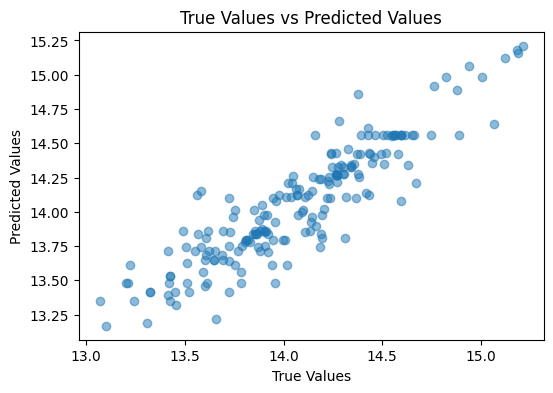

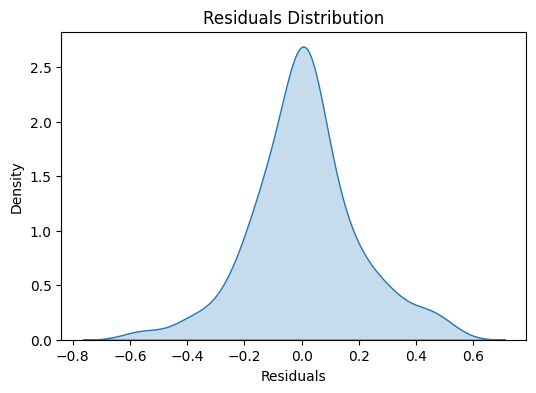

In [160]:
tree_model = DecisionTreeRegressor(max_depth=11, random_state=42)
tree_model.fit(X_train_prepared, y_train)
y_pred_tree = tree_model.predict(X_test_prepared)

r2 = r2_score(y_test, y_pred_tree)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_tree))

plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_tree, alpha=0.5)
plt.title('True Values vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

residuals = y_test - y_pred_tree
plt.figure(figsize=(6, 4))
sns.kdeplot(residuals, fill=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

Yes, the true values and the true values do roughly line up along the diagonal of x=y. Furthermore, the kernel density plot indicates that the residuals have a bell shaped distribution that sits around 0.

### Part 9
Which model --- linear model or classification and regression tree --- has better performance on the test set?

My best model was ultimately the decision regressor where I did not perform expansion, but I one-hot encoding the categorical variables. The max_depth hyperparameter performed the best when it was set to 11. The final R-squared and RMSE of this model was 0.815 and 0.1866, respectively.

**Q2.** The is a question about regression using decision trees and linear models. The data include wages at data science-y jobs, including

  - `Rating`: Company worker happiness score
  - `Size`: Number of employees
  - `Sector`: Part of the economy
  - `avg_salary`: Average wage
  - `job_state`: Location of work

  1. Load the `wages_hw.csv` file. Split the sample into an ~80% training set and a ~20% test set. Do any necessary cleaning, including outliers and missings.
  2. Use a linear model to regress `avg_salary` on `Sector`. Which sectors have the highest predicted wages? What is the $R^2$ and `RMSE` on the test set?
  3. Make a scatterplot of `avg_salary` and `Rating`. Is there an obvious visual relationship between the two variables? Regress `avg_salary` on `Rating` as a numeric variable: Do higher ratings predict higher or lower wages? Convert `Rating` to a one-hot encoded variable, with a category for each rating. Run a regression of `avg_salary` on the categorical version. How do your results change? Explain. Which version has a higher $R^2$ and lower `RMSE`?
  4. Now interact `Sector` with the categorical version of `Rating`, so your regressors are a (Sector, Rating) pair; this is a programming puzzle you'll have to think about, but using the `.PolynomialFeatures()` function on the one-hot encoded categorical variables is one option, and another is pre-processing a new variable that interacts `Sector` and `Rating` and then one-hot encoding the result. Regress `avg_salary` on the (Sector, Rating) pairs. How does the $R^2$ and `RMSE` on the test set compare to part 2? Interpret the coefficients; which sector-rating pairs have the highest wages?
  5. Run a linear regression of `avg_salary` on all the variables. What is the $R^2$ on the test set? How does it compare to your simpler models in 2--4?
  6. Build a decision tree by regressing `avg_salary` on `Sector`, `Rating`, and the (Sector, Rating) pairs. What are the $R^2$ and `RMSE` of your models on the test set? How do your answers compare to parts 2, 3, and 4?
  7. Build a decision tree by regressing `avg_salary` on all the other variables. What is the $R^2$ and `RMSE` on the test set?
  8. Build a linear regression or decision tree using the available variables based on your own judgment. What degrees of freedom are you giving the model to predict variation in wages across company and location attributes? What is the $R^2$ and `RMSE` of your model? How does it compare to the previous ones in the question? Why does yours perform better or worse on the test set?

## Question 2

### Part 1

Load the wages_hw.csv file. Split the sample into an ~80% training set and a ~20% test set. Do any necessary cleaning, including outliers and missings

In [161]:
wages = pd.read_csv("wages_hw.csv")
nan_details = wages.isnull().sum()
nan_details

Unnamed: 0    0
Rating        0
Size          0
Sector        0
avg_salary    0
job_state     0
dtype: int64

In [162]:
wages = wages.drop(columns=["Unnamed: 0"])
wages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rating      731 non-null    float64
 1   Size        731 non-null    object 
 2   Sector      731 non-null    object 
 3   avg_salary  731 non-null    float64
 4   job_state   731 non-null    object 
dtypes: float64(2), object(3)
memory usage: 28.7+ KB


<Axes: >

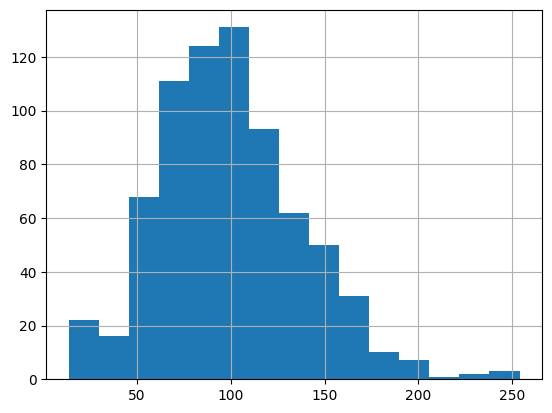

In [163]:
# checking to see if avg_salary needs to be scaled
wages['avg_salary'].hist(bins=15)

<Axes: >

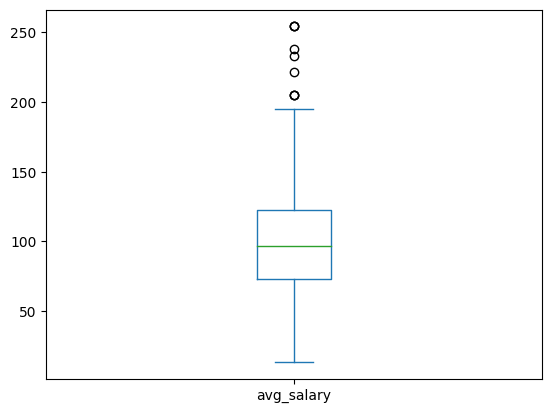

In [164]:
wages['avg_salary'].plot.box()

In [203]:
# removing the outliers for avg_salary
wages = wages.loc[wages['avg_salary']<190,:]

<Axes: >

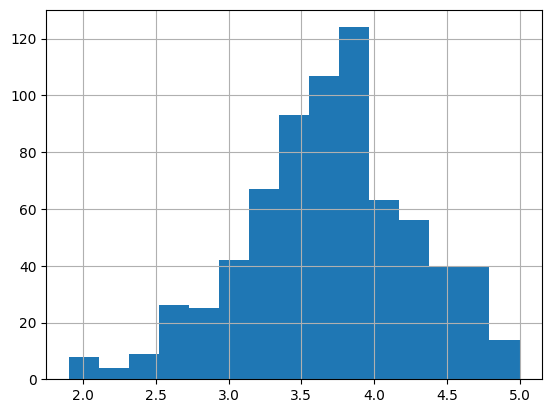

In [166]:
# checking to see if Ratings needs to be scaled
wages['Rating'].hist(bins=15)

In [194]:
from sklearn.preprocessing import StandardScaler
X = wages.drop(columns=['avg_salary'])
y = wages['avg_salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Part 2
Use a linear model to regress avg_salary on Sector. Which sectors have the highest predicted wages? What is the  R2  and RMSE on the test set?

In [195]:
X_train_sector = X_train[['Sector']]
X_test_sector = X_test[['Sector']]

cat_attribs = list(X_train_sector)

full_pipeline = ColumnTransformer([
        ("cat", OneHotEncoder(handle_unknown='ignore'), cat_attribs)
    ])
X_train_prepared = full_pipeline.fit_transform(X_train_sector)
X_test_prepared = full_pipeline.transform(X_test_sector)

linear_model = LinearRegression()
linear_model.fit(X_train_prepared, y_train)
y_pred = linear_model.predict(X_test_prepared)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

result_df = pd.DataFrame({'Sector': X_test['Sector'], 'Predicted_Wage': y_pred})
highest_predicted_wages = result_df.sort_values(by='Predicted_Wage', ascending=False)
print("R-squared (R2):", r2)
print("Root Mean Squared Error (RMSE):", rmse)
highest_predicted_wages.head(10)

R-squared (R2): 0.09175374252682245
Root Mean Squared Error (RMSE): 31.92108772160626


,Sector,Predicted_Wage
121,Media,119.875420
678,Media,119.875420
497,Biotech & Pharmaceuticals,112.217392
338,Biotech & Pharmaceuticals,112.217392
77,Biotech & Pharmaceuticals,112.217392
371,Biotech & Pharmaceuticals,112.217392
539,Biotech & Pharmaceuticals,112.217392
566,Biotech & Pharmaceuticals,112.217392
364,Biotech & Pharmaceuticals,112.217392
689,Biotech & Pharmaceuticals,112.217392


The two highest predicted sectors were Media and Biotech & Pharmaceuticals. For this model, the best method of scaling was to use arcsin on the Salary over using the original values or using the StandardScaler library function.

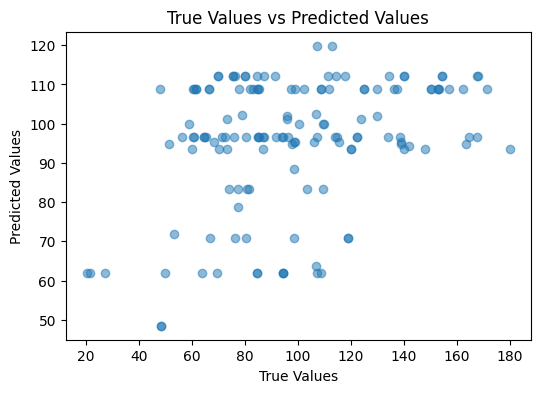

In [196]:
# plot to see how badly it predicts
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('True Values vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

### Part 3
Make a scatterplot of avg_salary and Rating. Is there an obvious visual relationship between the two variables? Regress avg_salary on Rating as a numeric variable: Do higher ratings predict higher or lower wages? Convert Rating to a one-hot encoded variable, with a category for each rating. Run a regression of avg_salary on the categorical version. How do your results change? Explain. Which version has a higher  R2  and lower RMSE?

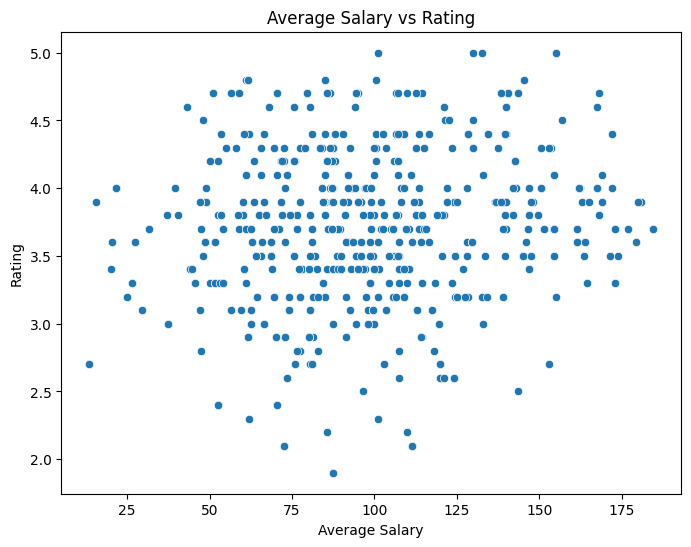

In [197]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='avg_salary', y='Rating', data=wages)
plt.title('Average Salary vs Rating')
plt.xlabel('Average Salary')
plt.ylabel('Rating')
plt.show()

There is no obvious visual relationship between the two. It is very scattered and there is no correlation between salary and rating.

In [198]:
X_train_rating = X_train[['Rating']]
X_test_rating = X_test[['Rating']]

linear_model = LinearRegression()
linear_model.fit(X_train_rating, y_train)
y_pred = linear_model.predict(X_test_rating)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

result_df = pd.DataFrame({'Rating': X_test['Rating'], 'Predicted_Wage': y_pred})
highest_ratings = result_df.sort_values(by='Rating', ascending=False)
lowest_ratings = result_df.sort_values(by='Rating', ascending=True)
print("R-squared (R2):", r2)
print("Root Mean Squared Error (RMSE):", rmse)
highest_ratings.head(15)
lowest_ratings.head(15)

R-squared (R2): -0.020462417943540423
Root Mean Squared Error (RMSE): 33.83563883765541


,Rating,Predicted_Wage
77,1.9,78.655489
338,2.1,80.787109
198,2.6,86.116159
367,2.6,86.116159
166,2.7,87.181969
241,2.7,87.181969
428,2.7,87.181969
72,2.7,87.181969
65,2.8,88.247779
451,2.9,89.313589


Yes, based on just looking at the top 15 ratings, the predicted wages decrease as the rating decreases. Also, looking at the lowest 15 ratings, as the ratings increase, the wages also increase. Therefore, it can be said that the model tends to predict higher wages for higher ratings.

In [199]:
X_train_rating = X_train[['Rating']]
X_test_rating = X_test[['Rating']]
cat_attribs = list(X_train_rating)

full_pipeline = ColumnTransformer([
        ("cat", OneHotEncoder(handle_unknown='ignore'), cat_attribs)
    ])
X_train_prepared = full_pipeline.fit_transform(X_train_rating)
X_test_prepared = full_pipeline.transform(X_test_rating)

linear_model = LinearRegression()
linear_model.fit(X_train_prepared, y_train)
y_pred = linear_model.predict(X_test_prepared)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("R-squared (R2):", r2)
print("Root Mean Squared Error (RMSE):", rmse)

R-squared (R2): -0.0328620331283096
Root Mean Squared Error (RMSE): 34.04058617148843


The model that regresses solely on Rating and avg_salary without one-hot encoding performs better than the model that uses one-hot encoding. One-hot encoding leads to more features which means there are more thetas (coefficients) for the model to optimize. Therefore, it makes the problem more complex and could lead to a model that performs worse on a test set.

### Part 4
Now interact Sector with the categorical version of Rating, so your regressors are a (Sector, Rating) pair; this is a programming puzzle you'll have to think about, but using the .PolynomialFeatures() function on the one-hot encoded categorical variables is one option, and another is pre-processing a new variable that interacts Sector and Rating and then one-hot encoding the result. Regress avg_salary on the (Sector, Rating) pairs. How does the  R2  and RMSE on the test set compare to part 2? Interpret the coefficients; which sector-rating pairs have the highest wages?

In [201]:
X_train_pair = X_train[['Sector', 'Rating']]
X_test_pair = X_test[['Sector', 'Rating']]

cat_attribs = list(X_train_pair)
full_pipeline = Pipeline([
    ('cat', ColumnTransformer([
        ("cat", OneHotEncoder(handle_unknown='ignore'), cat_attribs)
    ], remainder='passthrough')),
])
expander = PolynomialFeatures(degree=2,include_bias=False)

X_train_prepared = expander.fit_transform(full_pipeline.fit_transform(X_train_pair))
X_test_prepared = expander.transform(full_pipeline.transform(X_test_pair))

names = expander.get_feature_names_out()

linear_model = LinearRegression()
linear_model.fit(X_train_prepared, y_train)
y_pred = linear_model.predict(X_test_prepared)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("R-squared (R2):", r2)
print("Root Mean Squared Error (RMSE):", rmse)

coefficients = linear_model.coef_
coefficients_df = pd.DataFrame({'Feature': names, 'Coefficient': coefficients})
coefficients_df

R-squared (R2): 0.08376786247105306
Root Mean Squared Error (RMSE): 32.06111586671875


,Feature,Coefficient
0,x0,11.751112
1,x1,2.396662
2,x2,-0.214197
3,x3,-16.215927
4,x4,11.637307
...,...,...
1534,x51 x52,0.000000
1535,x51 x53,0.000000
1536,x52^2,-1.203778
1537,x52 x53,0.000000


In [177]:
result_df = pd.DataFrame({'Sector': X_test['Sector'], 'Rating': X_test['Rating'], 'Predicted_Wage': y_pred})
highest_predicted_wages = result_df.sort_values(by='Predicted_Wage', ascending=False)
highest_predicted_wages.head(10)

,Sector,Rating,Predicted_Wage
683,Information Technology,5.0,147.500725
86,Retail,3.2,139.000167
435,Business Services,3.3,137.167143
417,Biotech & Pharmaceuticals,3.5,134.549838
55,Biotech & Pharmaceuticals,3.5,134.549838
497,Biotech & Pharmaceuticals,3.7,133.317542
666,Biotech & Pharmaceuticals,3.7,133.317542
222,Biotech & Pharmaceuticals,3.7,133.317542
121,Media,3.5,128.000991
156,Telecommunications,3.8,127.999815


I believe I performed the required tasks correctly by first one-hot encoding and then interacting the two variables using polynomical features. I then created a new dataframe with each pair and the coefficient. Looking at the coefficients, the larger and more positive a coefficient is, the more weight the pair has in predicting the average salary. Furthermore, the pairs that produced the highest predicted salaries were Information Technology with a rating of 5.0 and Retail with a rating of 3.2.

### Part 5
Run a linear regression of avg_salary on all the variables. What is the  R2  on the test set? How does it compare to your simpler models in 2--4?

In [202]:
X_train_cat = X_train.select_dtypes(include=['object'])
X_train_num = X_train.select_dtypes(include=['number'])
num_attribs = list(X_train_num)
cat_attribs = list(X_train_cat)

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median'))])

full_pipeline = ColumnTransformer([
        ('num', num_pipeline, num_attribs),
        ("cat", OneHotEncoder(handle_unknown='ignore'), cat_attribs)
    ])

X_train_prepared = full_pipeline.fit_transform(X_train)
X_test_prepared = full_pipeline.transform(X_test)

model = LinearRegression()
model.fit(X_train_prepared, y_train)
y_pred = model.predict(X_test_prepared)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R-squared (R2):", r2)
print("Root Mean Squared Error (RMSE):", rmse)

R-squared (R2): 0.24272113768857206
Root Mean Squared Error (RMSE): 29.147666413081993


It performs much better than my simpler models that I created in 2-4. Although still not very good models (low R2 and a pretty high RMSE), it shows that maybe adding more features enhances a models performace because it is better at catching more nuanced patterns in the dataset and might be less prone to overfitting.

### Part 6
Build a decision tree by regressing avg_salary on Sector, Rating, and the (Sector, Rating) pairs. What are the  R2  and RMSE of your models on the test set? How do your answers compare to parts 2, 3, and 4?

In [179]:
# Look at just Sector
X_train_rating = X_train[['Sector']]
X_test_rating = X_test[['Sector']]
cat_attribs = list(X_train_rating)

full_pipeline = ColumnTransformer([
        ("cat", OneHotEncoder(handle_unknown='ignore'), cat_attribs)
    ])
X_train_prepared = full_pipeline.fit_transform(X_train_rating)
X_test_prepared = full_pipeline.transform(X_test_rating)

tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train_prepared, y_train)
y_pred = tree.predict(X_test_prepared)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("R-squared (R2):", r2)
print("Root Mean Squared Error (RMSE):", rmse)

R-squared (R2): 0.09229530703515465
Root Mean Squared Error (RMSE): 31.911569429731138


In [180]:
# Look at just Rating the categorical way
X_train_rating = X_train[['Rating']]
X_test_rating = X_test[['Rating']]
cat_attribs = list(X_train_rating)

full_pipeline = ColumnTransformer([
        ("cat", OneHotEncoder(handle_unknown='ignore'), cat_attribs)
    ])
X_train_prepared = full_pipeline.fit_transform(X_train_rating)
X_test_prepared = full_pipeline.transform(X_test_rating)

tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train_prepared, y_train)
y_pred = tree.predict(X_test_prepared)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("R-squared (R2):", r2)
print("Root Mean Squared Error (RMSE):", rmse)

R-squared (R2): -0.03286144797205548
Root Mean Squared Error (RMSE): 34.04057652883333


In [184]:
# Look at the Rating, Sector Pairs
X_train_pair = X_train[['Sector', 'Rating']]
X_test_pair = X_test[['Sector', 'Rating']]
cat_attribs = list(X_train_pair)
full_pipeline = Pipeline([
    ('cat', ColumnTransformer([
        ("cat", OneHotEncoder(handle_unknown='ignore'), cat_attribs)
    ], remainder='passthrough')),
])
expander = PolynomialFeatures(degree=2,include_bias=False)

X_train_prepared = expander.fit_transform(full_pipeline.fit_transform(X_train_pair))
X_test_prepared = expander.transform(full_pipeline.transform(X_test_pair))

tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train_prepared, y_train)
y_pred = tree.predict(X_test_prepared)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("R-squared (R2):", r2)
print("Root Mean Squared Error (RMSE):", rmse)

R-squared (R2): 0.036866524522312205
Root Mean Squared Error (RMSE): 32.87146894617329


My decision tree regressor models overall performed worse than if not similar to my linear regression models. Neither of the algorithms performed exceptionally well.

### Part 7
Build a decision tree by regressing avg_salary on all the other variables. What is the R2 and RMSE on the test set?

In [185]:
X_train_cat = X_train.select_dtypes(include=['object'])
X_train_num = X_train.select_dtypes(include=['number'])
num_attribs = list(X_train_num)
cat_attribs = list(X_train_cat)

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median'))])

full_pipeline = ColumnTransformer([
        ('num', num_pipeline, num_attribs),
        ("cat", OneHotEncoder(handle_unknown='ignore'), cat_attribs)
    ])

X_train_prepared = full_pipeline.fit_transform(X_train)
X_test_prepared = full_pipeline.transform(X_test)

tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train_prepared, y_train)
y_pred = tree.predict(X_test_prepared)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R-squared (R2):", r2)
print("Root Mean Squared Error (RMSE):", rmse)

R-squared (R2): 0.4528457988118544
Root Mean Squared Error (RMSE): 24.775974323254562


The R-squared value, 0.45, and the RMSE value, 24.78, indicate that this model performed the best out of all my previous models by a long shot. The RMSE is much lower than my previous models and the R2 is much closer to 1.

### Part 8
Build a linear regression or decision tree using the available variables based on your own judgment. What degrees of freedom are you giving the model to predict variation in wages across company and location attributes? What is the  R2  and RMSE of your model? How does it compare to the previous ones in the question? Why does yours perform better or worse on the test set?

In [193]:
# perform a grid search to find the best parameters to limit the freedom of the tree
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 10, 11, 12],
    'min_samples_split': [2, 5, 10],
    'criterion': ['friedman_mse', 'squared_error', 'absolute_error', 'poisson']
}

tree = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train_prepared, y_train)
print("Best Hyperparameters:", grid_search.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Hyperparameters: {'criterion': 'poisson', 'max_depth': 11, 'min_samples_split': 2}


In [190]:
tree = DecisionTreeRegressor(criterion = 'poisson', max_depth= 11, min_samples_split = 2, random_state=42)
tree.fit(X_train_prepared, y_train)
y_pred = tree.predict(X_test_prepared)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R-squared (R2):", r2)
print("Root Mean Squared Error (RMSE):", rmse)

R-squared (R2): 0.30977938535201577
Root Mean Squared Error (RMSE): 27.82722094131085


My model performs better than most of my previous models, but does not perform better than the model where I did not specify any of the hyperparameters. It could have performed worse because I did not do an adequate enough of a grid search and my parameter grid should have including more values to grid search on. For eaxmple, I could have tested more values for the min_samples_split hyperparameter.

**Q3.** This a question purely on categorical prediction. The data for this happen to be gathered in 1987 in Indonesia, and concern contraceptive method choice. The questions and data-gathering assumptions reflect the culture and attitudes of that time and place, but provide a good example of a categorical prediction problem on an important topic (family planning and maternal health The variables in the data are:

    - Wife's age (numerical)
    - Wife's education (categorical) 1=low, 2, 3, 4=high
    - Husband's education (categorical) 1=low, 2, 3, 4=high
    - Number of children ever born (numerical)
    - Wife's religion (binary) 0=Non-Islam, 1=Islam
    - Wife's now working? (binary) 0=Yes, 1=No
    - Husband's occupation (categorical) 1, 2, 3, 4
    - Standard-of-living index (categorical) 1=low, 2, 3, 4=high
    - Media exposure (binary) 0=Good, 1=Not good
    - Contraceptive method used (class attribute) 1=No-use, 2=Long-term, 3=Short-termhort-term

  1. Load the `contraceptiveMethodChoice.csv` data. Tabulate the `method` variable (i.e. `.value_counts()`). 1 corresponds to `No Contraception`, 3 corresponds to `Short Term` (e.g. condoms, birth control pills), and 2 corresponds to `Long Term` (e.g. IUD, sterilization). Cross tabulate `method` and `numberChildren`. Do couples that use birth control tend to have more children than those who don't?
  2. Split the sample into ~80% training data and ~20% testing data.
  3. We are now going to make a mistake. Train a regression tree to predict the contraceptive method using the other variables in the data, not a classification tree. Look at the terminal nodes in the tree: What values do they take? Does that make sense? Explain clearly what has gone wrong here.
  4. Instead of regression, use a classification tree to predict contraceptive method using the other variables in the data. How does it look different from the previous tree? What variables does the algorithm use? In broad terms, which groups of people are most likely to use each method of contraception?
  5. Compute a confusion matrix for your classification tree on the test set (Hint: There are now three categories instead of two, so the cross tabulation will be a $3 \times 3$ matrix instead of $2 \times 2$.). Compute the Accuracy of your model overall, and the Accuracy for predicting each contraceptive method.
  7. Why can't you use a linear probability model to do this exercise? Explain clearly in words.

**Q4.** This is a question where we use regression and regression trees. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running these regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q5.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{eqnarray*}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{eqnarray*}

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{eqnarray*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{eqnarray*}

which can be written in terms of sample covariance and sample variance as:

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{eqnarray*}

This is typically the preferred way of expressing the OLS coefficients.

4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?
5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)
6. Let's return to the question of *outliers*. With your formula for the OLS coefficients $(a^*,b^*)$, explain what happens if you significantly increase a single value of the outcome/target/response variable $y_i$ or one of the predictor/explanatory/covariate variables $x_i$. If values for some extreme observations are exerting significant influence over the regression coefficients, will the model perform well on for more average observations?